In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dsmc_core import DSMC_Core

In [2]:
sim = DSMC_Core()
sim.wp.Omega = 0.01
sim.wp.T0 = 1e-4
sim.wp.Nx = 15
sim.wp.Ny = 15
sim.wp.Nz = 15

sim.pp.eps = 0.3

sim.initialize()
print(sim)


        -------------------------------------------------------------------------
                                  World Parameters
        -------------------------------------------------------------------------
                 Number of particles:          N = 100_000
                      Number density:          n = 0.500 1/m^3
              Simulation area volume:          V = 200_000.000 m^3
                     Number of boxes: Nx, Ny, Nz = (15, 15, 15)
        Simulation area linear sizes: Lx, Ly, Lz = (58.480, 58.480, 58.480) m
           Volume of the cubical box:      V_box = 59.259 m^3
              Linear size of the box:      L_box = 3.899 m
                       Orbital speed:      Omega = 0.01000 1/s
        -------------------------------------------------------------------------
                                  Particle Parameters
        -------------------------------------------------------------------------
                              Radius:          R = 

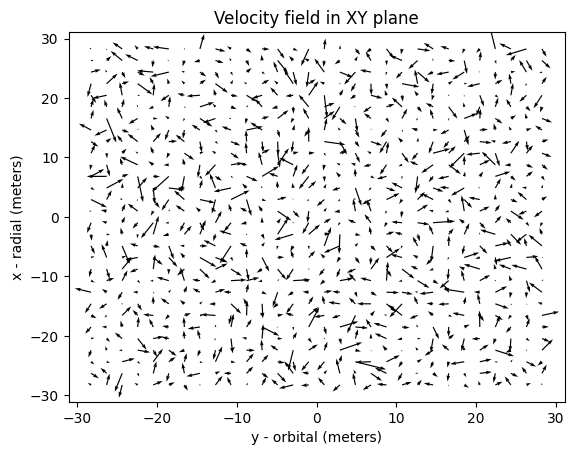

In [3]:
x,y,u,v = sim.plane_velocity_field(2*sim.wp.Nx, 2*sim.wp.Ny)
fig, ax1 = plt.subplots()
ax1.set_title("Velocity field in XY plane")
ax1.set_ylabel("x - radial (meters)")
ax1.set_xlabel("y - orbital (meters)")
Q = ax1.quiver(y,x,v,u, units='width')

<BarContainer object of 50 artists>

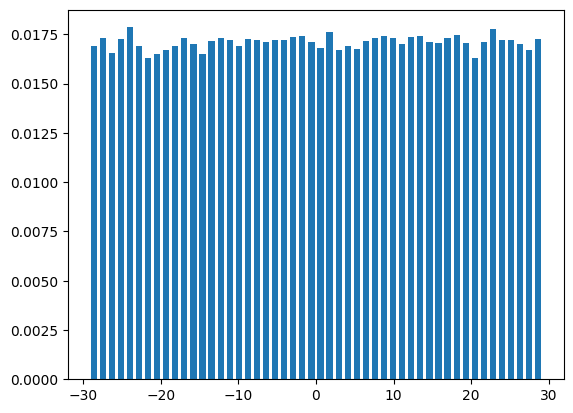

In [4]:
hist, bins = sim.vertical_view(50)
diff = np.diff(bins)[0]
bins_shifted = bins[:-1]+diff/2
plt.bar(bins_shifted, hist)

In [5]:
time_array = np.asarray([sim.t])
temp_array = np.asarray([sim.T0])
calt_array = np.asarray([sim.calibrated_temperature])
ncol_array = np.asarray([sim.nc])
sim_end = 3/sim.wp.Omega

while sim.t < sim_end:
    sim.make_step()
    time_array = np.append(time_array, sim.t)
    temp_array = np.append(temp_array, sim.temperature)
    calt_array = np.append(calt_array, sim.calibrated_temperature)
    ncol_array = np.append(ncol_array, sim.nc)
    print(f" Simulating: {100*sim.t/sim_end:3.2f}%, time: {sim.t:.3f}, dt: {sim.dt:.3f}, temperature: {sim.temperature:.3f}, calibrated temperature: {sim.calibrated_temperature:.3f}, total collisions: {sim.nc}", end="\r", flush=True)
print("")
print("Finished simulation")

 Simulating: 101.77%, time: 101.765, dt: 2.353, temperature: 0.026, calibrated temperature: 0.007, total collisions: 15866
Finished simulation


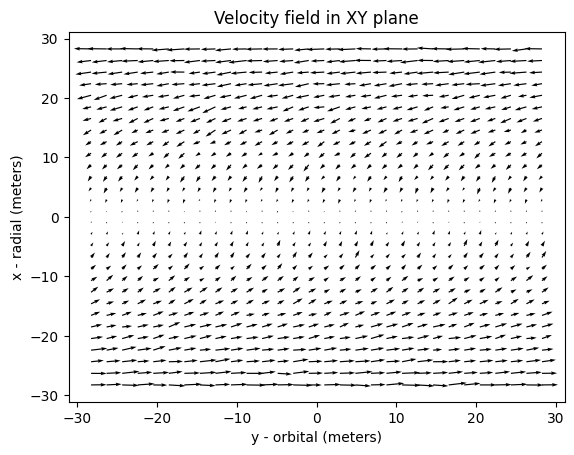

In [6]:
x,y,u,v = sim.plane_velocity_field(2*sim.wp.Nx, 2*sim.wp.Ny)
fig, ax1 = plt.subplots()
ax1.set_title("Velocity field in XY plane")
ax1.set_ylabel("x - radial (meters)")
ax1.set_xlabel("y - orbital (meters)")
Q = ax1.quiver(y,x,v,u, units='width')

<BarContainer object of 100 artists>

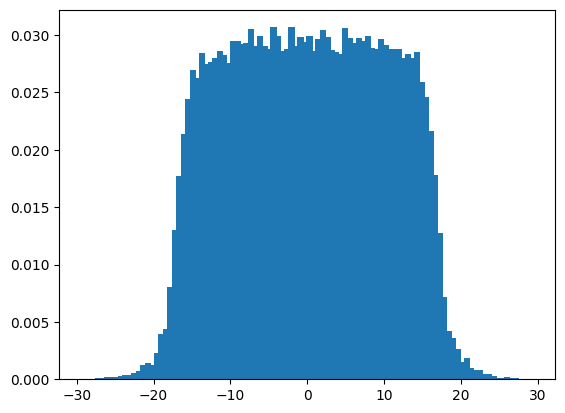

In [7]:
hist, bins = sim.vertical_view(100)
diff = np.diff(bins)[0]
bins_shifted = bins[:-1]+diff/2
plt.bar(bins_shifted, hist)

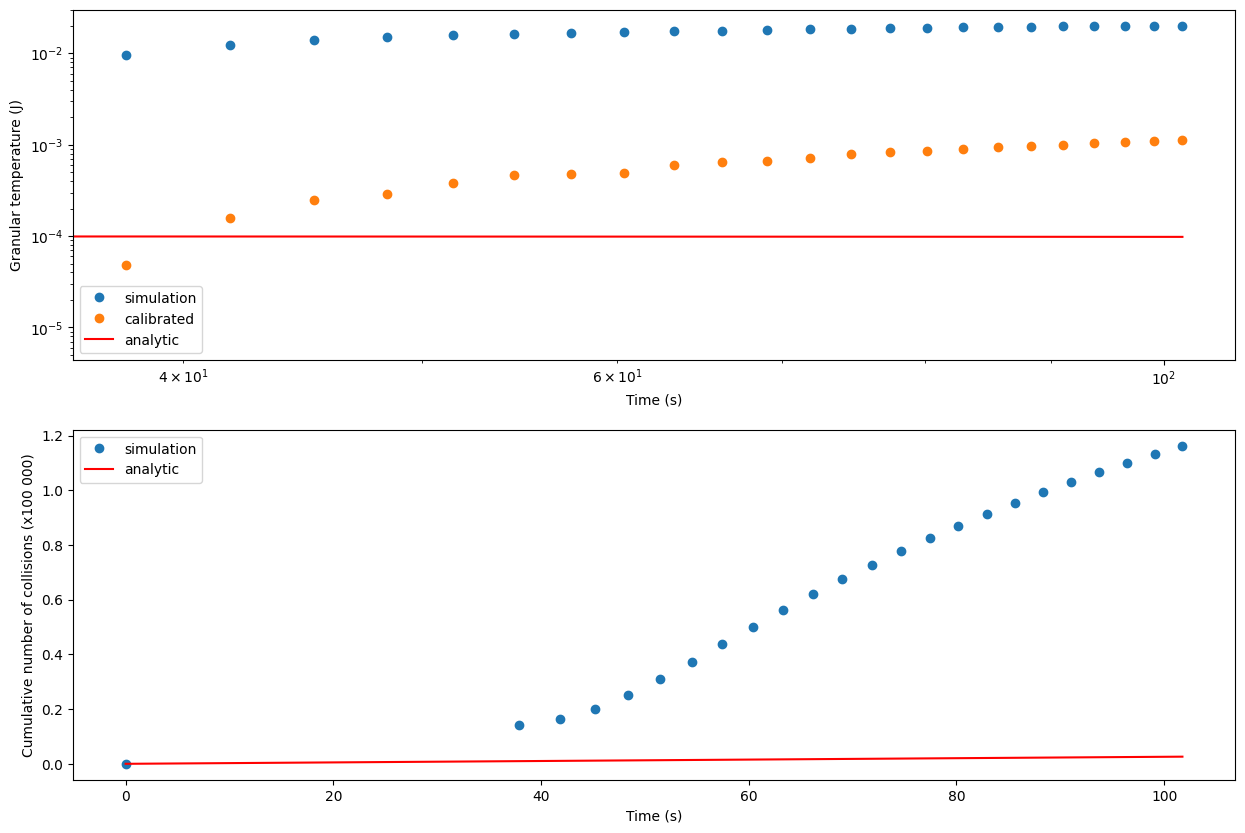

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.plot(time_array, temp_array, "o", label="simulation")
ax1.plot(time_array, calt_array, "o", label="calibrated")
ax1.plot(time_array, sim.haff_cooling(time_array), label="analytic", color="red")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Granular temperature (J)")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.legend()

ax2.plot(time_array, ncol_array / sim.wp.N, "o", label="simulation")
ax2.plot(
    time_array,
    sim.ncol_analytic(time_array) / sim.wp.N,
    label="analytic",
    color="red",
)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Cumulative number of collisions (x100 000)")
ax2.legend()

In [43]:
nx, ny = 5*sim.wp.Nx, 5*sim.wp.Ny
u_grid = np.zeros((nx,ny), dtype=np.float64)
v_grid = np.zeros((nx,ny), dtype=np.float64)
x_grid, y_grid = np.meshgrid(np.linspace(-sim.wp.Lx/2, sim.wp.Lx/2, nx), np.linspace(-sim.wp.Ly/2, sim.wp.Ly/2, ny))
x_grid = x_grid.T
y_grid = y_grid.T

for i in range(sim.wp.N):
    ix = int(nx*(sim.rx[i]-sim.wp.Lx/2)/sim.wp.Lx)
    iy = int(ny*(sim.ry[i]-sim.wp.Ly/2)/sim.wp.Ly)
    u_grid[ix,iy] += sim.vx[i]
    v_grid[ix,iy] += sim.vy[i]

u_grid /= sim.wp.N
v_grid /= sim.wp.N

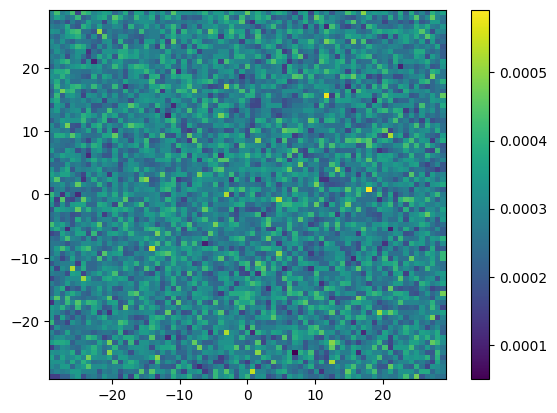

In [44]:
plt.hist2d(sim.rx, sim.ry, bins=(nx,ny), density=True)
plt.colorbar()

In [57]:
vx.min()

-0.9999999999935897